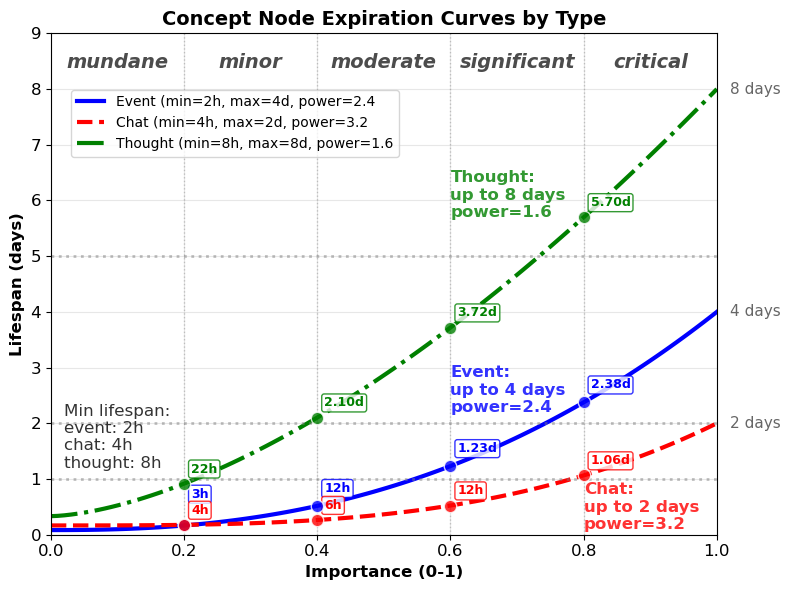

Sample lifespan values:
--------------------------------------------------

EVENT (power=2.4):
  Importance 0.0:  0.08 days
  Importance 0.1:  0.10 days
  Importance 0.2:  0.17 days
  Importance 0.4:  0.52 days
  Importance 0.6:  1.23 days
  Importance 0.8:  2.38 days
  Importance 1.0:  4.00 days

CHAT (power=3.2):
  Importance 0.0:  0.17 days
  Importance 0.1:  0.17 days
  Importance 0.2:  0.18 days
  Importance 0.4:  0.26 days
  Importance 0.6:  0.52 days
  Importance 0.8:  1.06 days
  Importance 1.0:  2.00 days

THOUGHT (power=1.6):
  Importance 0.0:  0.33 days
  Importance 0.1:  0.53 days
  Importance 0.2:  0.92 days
  Importance 0.4:  2.10 days
  Importance 0.6:  3.72 days
  Importance 0.8:  5.70 days
  Importance 1.0:  8.00 days


In [40]:
import numpy as np
import matplotlib.pyplot as plt

def compute_lifespan_days(importance, min_hours, max_hours, power):
    """
    Compute lifespan in days based on importance and configuration parameters.
    """
    lifespan_hours = min_hours + (max_hours - min_hours) * (importance ** power)
    return lifespan_hours / 24  # Convert hours to days

# Configuration for different concept types (same as your final implementation)
EXPIRATION_CONFIG = {
    "event": {"min_hours": 2, "max_hours": 96, "power": 2.4},
    "chat": {"min_hours": 4, "max_hours": 48, "power": 3.2},
    "thought": {"min_hours": 8, "max_hours": 192, "power": 1.6}
}

# Create importance values from 0 to 1
importance_values = np.linspace(0, 1, 100)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot curves for each concept type
colors = ['blue', 'red', 'green']
line_styles = ['-', '--', '-.']

for i, (concept_type, config) in enumerate(EXPIRATION_CONFIG.items()):
    min_hours = config["min_hours"]
    max_hours = config["max_hours"]
    power = config["power"]
    
    # Calculate lifespan for each importance value
    lifespan_days = [compute_lifespan_days(imp, min_hours, max_hours, power) 
                     for imp in importance_values]
    
    # Plot the curve
    plt.plot(importance_values, lifespan_days, 
             color=colors[i], 
             linestyle=line_styles[i],
             linewidth=3,
             label=f'{concept_type.capitalize()} (min={min_hours:}h, max={max_hours/24:.0f}d, power={power}')
    
    # Mark y-values at importance thresholds: 0.2, 0.4, 0.6, 0.8
    threshold_importances = [0.2, 0.4, 0.6, 0.8]
    threshold_lifespans = [compute_lifespan_days(imp, min_hours, max_hours, power) 
                          for imp in threshold_importances]
    
    # Add markers at threshold points
    plt.scatter(threshold_importances, threshold_lifespans, 
                color=colors[i], s=80, alpha=0.8, zorder=5, edgecolors='white', linewidth=1)
    
    
    # Add y-value labels for threshold points
    for imp, lifespan in zip(threshold_importances, threshold_lifespans):
        # Adjust vertical offset for Chat curve to avoid blocking Event curve
        if concept_type == 'chat':
            if imp < 0.3:
                xytext_offset = (5, 8)  # Move Chat labels higher
            else:
                xytext_offset = (5, 8)
        elif concept_type == 'event':
            if imp < 0.3:
                xytext_offset = (5, 20)
            else:
                xytext_offset = (5, 10)
        else:
            xytext_offset = (5, 8)   # Keep original offset for Event and Thought
            
        
        if lifespan < 1:
            annotate_text = f'{int(lifespan * 24)}h'
        else:
            annotate_text = f'{lifespan:.2f}d'
        
        plt.annotate(annotate_text,
                    xy=(imp, lifespan), 
                    xytext=xytext_offset, 
                    textcoords='offset points',
                    fontsize=9, 
                    color=colors[i],
                    weight='bold',
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8, edgecolor=colors[i]))

# Add vertical lines and labels for importance categories
importance_boundaries = [0.2, 0.4, 0.6, 0.8]
category_labels = ["mundane", "minor", "moderate", "significant", "critical"]
category_centers = [0.1, 0.3, 0.5, 0.7, 0.9]

# Add vertical boundary lines
for boundary in importance_boundaries:
    plt.axvline(x=boundary, color='gray', linestyle=':', alpha=0.4, linewidth=1)

# Add category labels
for center, label in zip(category_centers, category_labels):
    plt.text(center, 8.3, label, ha='center', va='bottom', fontsize=14, 
             alpha=0.7, weight='bold', style='italic')

# Customize the plot
plt.xlabel('Importance (0-1)', fontsize=12, fontweight='bold')
plt.ylabel('Lifespan (days)', fontsize=12, fontweight='bold')
plt.title('Concept Node Expiration Curves by Type', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10, bbox_to_anchor=(0.02, 0.74), loc='lower left')

# Set axis limits
plt.xlim(0, 1)
plt.ylim(0, 9)

# Add some reference lines
plt.axhline(y=1, color='gray', linestyle=':', alpha=0.5, linewidth=2)
plt.axhline(y=2, color='gray', linestyle=':', alpha=0.5, linewidth=2)
plt.axhline(y=5, color='gray', linestyle=':', alpha=0.5, linewidth=2)

# Add text annotations for key points
plt.text(0.02, 1.2, 'Min lifespan:\nevent: 2h\nchat: 4h\nthought: 8h', fontsize=12, alpha=0.8)
plt.text(0.6, 5.7, 'Thought:\nup to 8 days\npower=1.6', fontsize=12, alpha=0.8, color='green', weight='bold')
plt.text(0.8, 0.1, 'Chat:\nup to 2 days\npower=3.2', fontsize=12, alpha=0.8, color='red', weight='bold')
plt.text(0.6, 2.2, 'Event:\nup to 4 days\npower=2.4', fontsize=12, alpha=0.8, color='blue', weight='bold')

# Add reference line labels
plt.text(1.02, 2, '2 days', fontsize=11, alpha=0.6, va='center')
plt.text(1.02, 4, '4 days', fontsize=11, alpha=0.6, va='center')
plt.text(1.02, 8, '8 days', fontsize=11, alpha=0.6, va='center')

# Make tick labels larger
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Tight layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print some sample values for verification
print("Sample lifespan values:")
print("-" * 50)
for concept_type, config in EXPIRATION_CONFIG.items():
    print(f"\n{concept_type.upper()} (power={config['power']}):")
    for importance in [0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
        lifespan_days = compute_lifespan_days(importance, 
                                            config["min_hours"], 
                                            config["max_hours"], 
                                            config["power"])
        print(f"  Importance {importance:3.1f}: {lifespan_days:5.2f} days")